In [ ]:
!pip install pandas numpy matplotlib ta

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta

In [3]:
apple = pd.read_csv('dataset/Apple_stock_data.csv').iloc[2:]
fb = pd.read_csv('dataset/Facebook_stock_data.csv').iloc[2:]
tesla = pd.read_csv('dataset/Tesla_stock_data.csv').iloc[2:]
jp = pd.read_csv('dataset/JP Morgan_stock_data.csv').iloc[2:]
amazon = pd.read_csv('dataset/Amazon_stock_data.csv').iloc[2:]

apple['Close'] = apple['Close'].astype(float)
fb['Close'] = fb['Close'].astype(float)
tesla['Close'] = tesla['Close'].astype(float)
jp['Close'] = jp['Close'].astype(float)
amazon['Close'] = amazon['Close'].astype(float)

In [4]:
def momentum(df, back, company):
  st = df.copy()

  # Basic trends
  st.loc[:, 'Price'] = pd.to_datetime(st['Price'])
  st.loc[:, 'daily_return'] = st['Close'].pct_change(back)
  st.loc[:, 'ma10'] = ta.trend.sma_indicator(st['Close'], window=10)
  st.loc[:, 'ma50'] = ta.trend.sma_indicator(st['Close'], window=50)
  st.loc[:, 'rsi'] = ta.momentum.rsi(st['Close'], window=14)

  # signals
  st.loc[:, 'ma_signal'] = np.where(st['ma10'] > st['ma50'], 1, 0)
  st.loc[:, 'rsi_signal'] = np.where((st['rsi'] < 70) & (st['rsi'] > 30), 1, 0)
  st.loc[:, 'signal'] = st['ma_signal'] * st['rsi_signal']
  st.loc[:, 'position_change'] = st['signal'].diff()

  #returns
  st.loc[:, 'strategy_return'] = st['signal'].shift(1) * st['daily_return']
  st.loc[:, 'cumul_market_return'] = (1 + st['daily_return']).cumprod()
  st.loc[:, 'cumul_strategy_return'] = (1 + st['strategy_return']).cumprod()

  st = st.dropna()

  total_days = len(st)
  trading_days_per_year = 252
  years = total_days / trading_days_per_year

  total_return_market = st['cumul_market_return'].iloc[-1] - 1
  total_return_strategy = st['cumul_strategy_return'].iloc[-1] - 1

  annual_return_market = (1 + total_return_market) ** (1 / years) - 1
  annual_return_strategy = (1 + total_return_strategy) ** (1 / years) - 1

  # Max Drawdown
  st.loc[:, 'market_peak'] = st['cumul_market_return'].cummax()
  st.loc[:, 'market_drawdown'] = (st['cumul_market_return'] / st['market_peak']) - 1
  max_drawdown_market = st['market_drawdown'].min()

  st.loc[:, 'strategy_peak'] = st['cumul_strategy_return'].cummax()
  st.loc[:, 'strategy_drawdown'] = (st['cumul_strategy_return'] / st['strategy_peak']) - 1
  max_drawdown_strategy = st['strategy_drawdown'].min()

  print(f"Performance of {company} by looking back {back} days:\n")
  print(f"Total Return (Market): {total_return_market:.2%}")
  print(f"Total Return (Strategy): {total_return_strategy:.2%}")
  print(f"Annualized Return (Market): {annual_return_market:.2%}")
  print(f"Annualized Return (Strategy): {annual_return_strategy:.2%}")
  print(f"Maximum Drawdown (Market): {max_drawdown_market:.2%}")
  print(f"Maximum Drawdown (Strategy): {max_drawdown_strategy:.2%}")
  print('\n\n')

  plt.plot(st.index, st['cumul_market_return'], label='Buy and Hold')
  plt.plot(st.index, st['cumul_strategy_return'], label='Momentum Strategy')
  plt.xlabel('No. of years')
  plt.ylabel('Cumulative Return')
  plt.title(f'Strategy vs. Buy and Hold of {company} with {back} days lookback')
  plt.legend()
  plt.show()

  print('\n\n')

Performance of Apple by looking back 20 days:

Total Return (Market): 12677526807000551260160.00%
Total Return (Strategy): 88636571973015207673856.00%
Annualized Return (Market): 11232.47%
Annualized Return (Strategy): 13723.94%
Maximum Drawdown (Market): -99.95%
Maximum Drawdown (Strategy): -52.45%





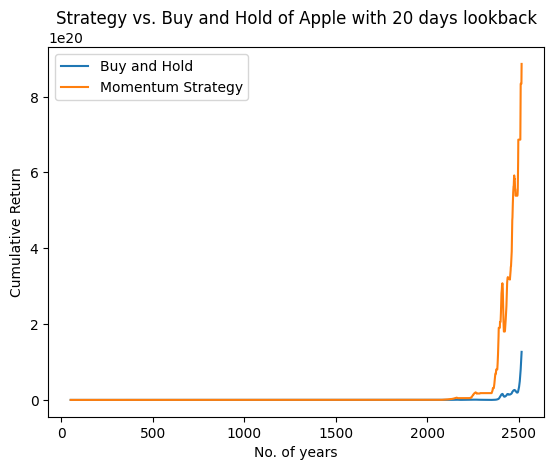




Performance of Facebook by looking back 20 days:

Total Return (Market): 107627412078021984256.00%
Total Return (Strategy): 55338267548071207920977575936.00%
Annualized Return (Market): 6861.11%
Annualized Return (Strategy): 53958.49%
Maximum Drawdown (Market): -100.00%
Maximum Drawdown (Strategy): -42.26%





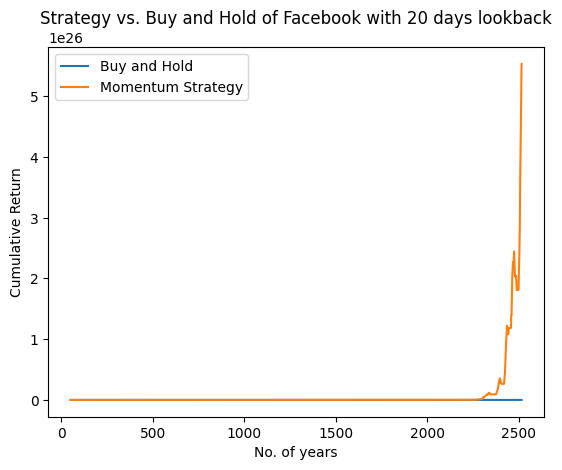




Performance of Tesla by looking back 20 days:

Total Return (Market): 53212482608143378285172742946816.00%
Total Return (Strategy): 899007398294985228937800456893104128.00%
Annualized Return (Market): 108967.36%
Annualized Return (Strategy): 294835.90%
Maximum Drawdown (Market): -100.00%
Maximum Drawdown (Strategy): -88.49%





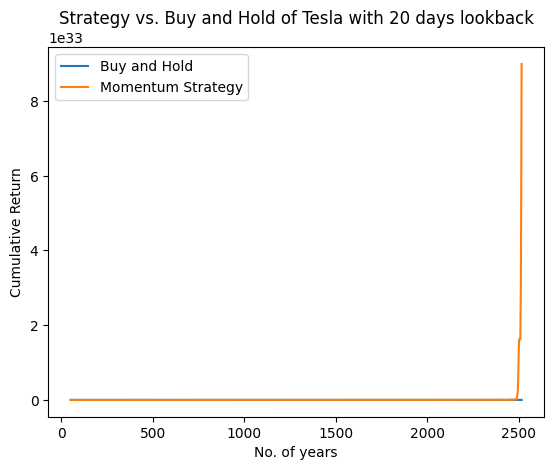




Performance of JP Morgan by looking back 20 days:

Total Return (Market): 63201716146227712.00%
Total Return (Strategy): 18217602232398340096.00%
Annualized Return (Market): 3154.49%
Annualized Return (Strategy): 5705.58%
Maximum Drawdown (Market): -99.98%
Maximum Drawdown (Strategy): -45.45%





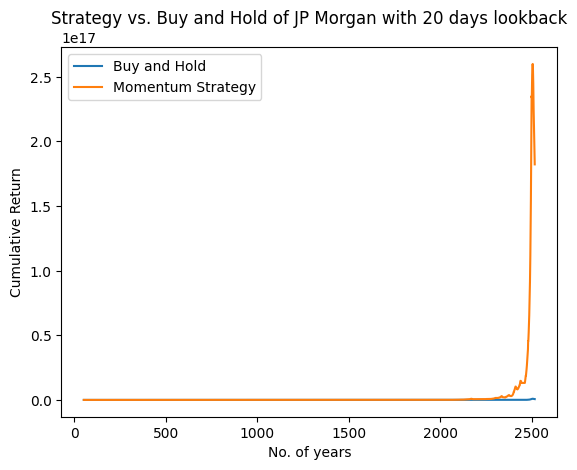




Performance of Amazon by looking back 20 days:

Total Return (Market): 26498576656091661935312896.00%
Total Return (Strategy): 75017792622505552933409521664.00%
Annualized Return (Market): 24652.21%
Annualized Return (Strategy): 55665.70%
Maximum Drawdown (Market): -100.00%
Maximum Drawdown (Strategy): -72.22%





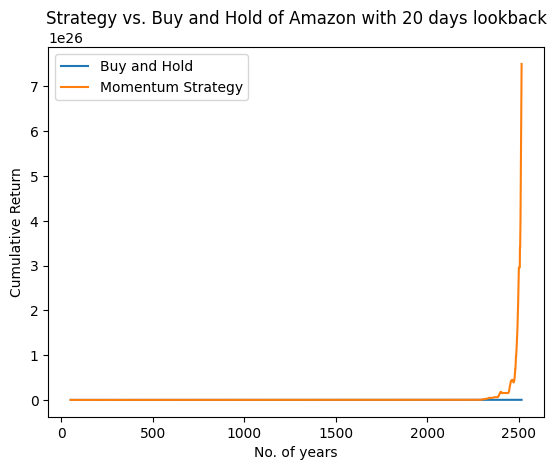

In [5]:
momentum(apple, 20, "Apple")
momentum(fb, 20, "Facebook")
momentum(tesla, 20, "Tesla")
momentum(jp, 20, "JP Morgan")
momentum(amazon, 20, "Amazon")